<a href="https://colab.research.google.com/github/DM2003/OIBSIP/blob/main/OIBSIP_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHOR: Debangan Mukherjee

In [1]:
# TASK 1
# Oasis InfoByte Data Science Internship
# Iris Flower Classification
# Dataset: https://www.kaggle.com/datasets/saurabh00007/iriscsv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
sns.set(style = 'white', color_codes = True)

In [3]:
iris_classification = pd.read_csv('/content/OIBSIP_IRIS_CLASSIFICATION.zip')

In [4]:
iris_classification.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_classification.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_classification.shape

(150, 6)

In [7]:
iris_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris_classification.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Thus, we can see there are no missing values

In [9]:
iris_classification.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_classification['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Thus, it is a properly balanced dataset and we don't need to balance it further

VIOLIN PLOTS

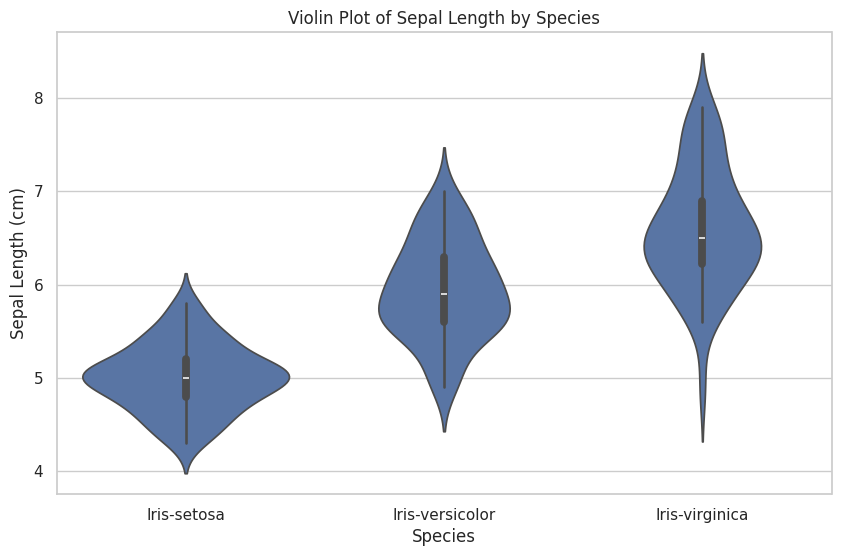

In [11]:
sns.set(style="whitegrid")

# Creating the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="SepalLengthCm", data=iris_classification)
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

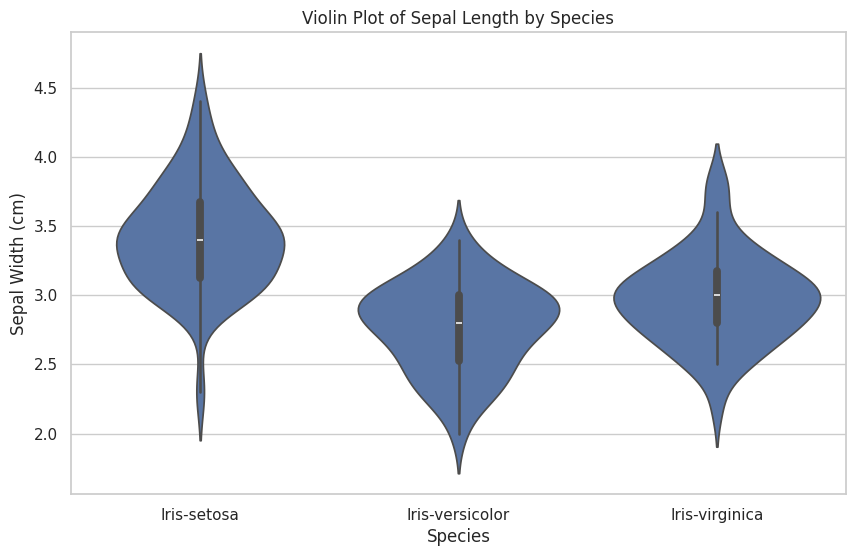

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="SepalWidthCm", data=iris_classification)
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

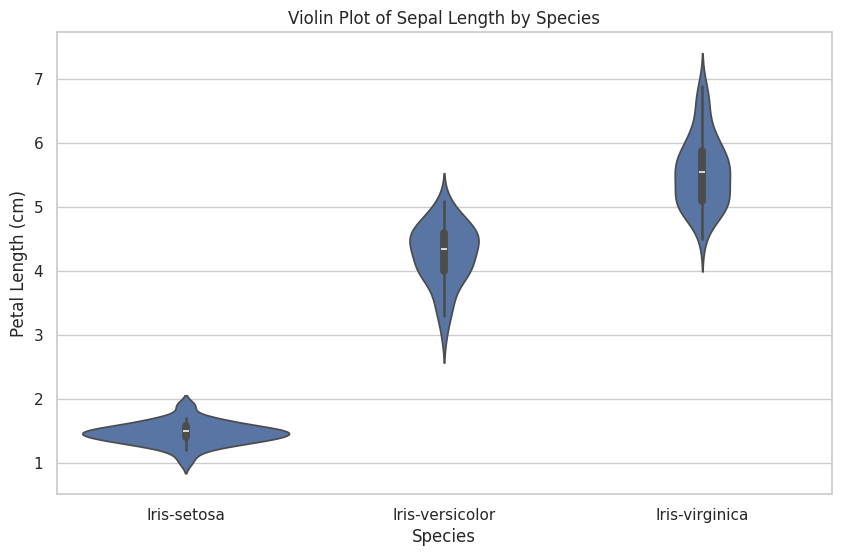

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="PetalLengthCm", data=iris_classification)
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

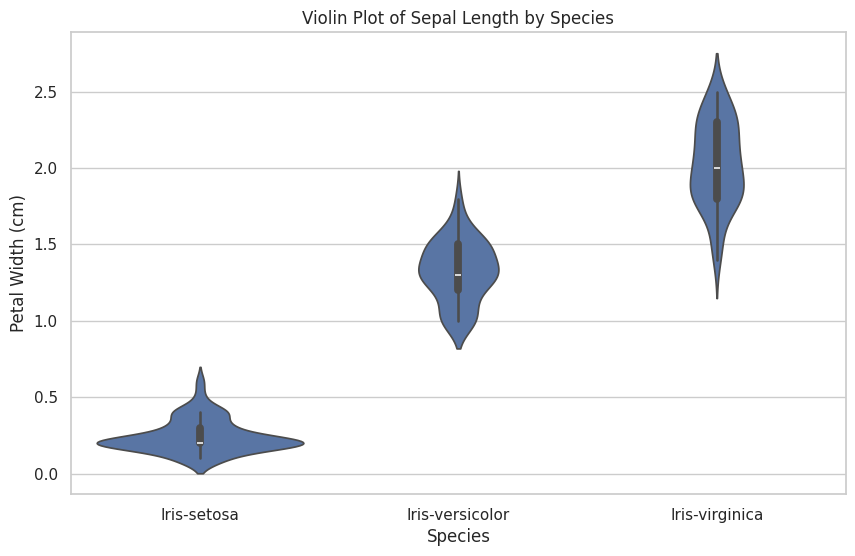

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="PetalWidthCm", data=iris_classification)
plt.title('Violin Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

SCATTERPLOTS

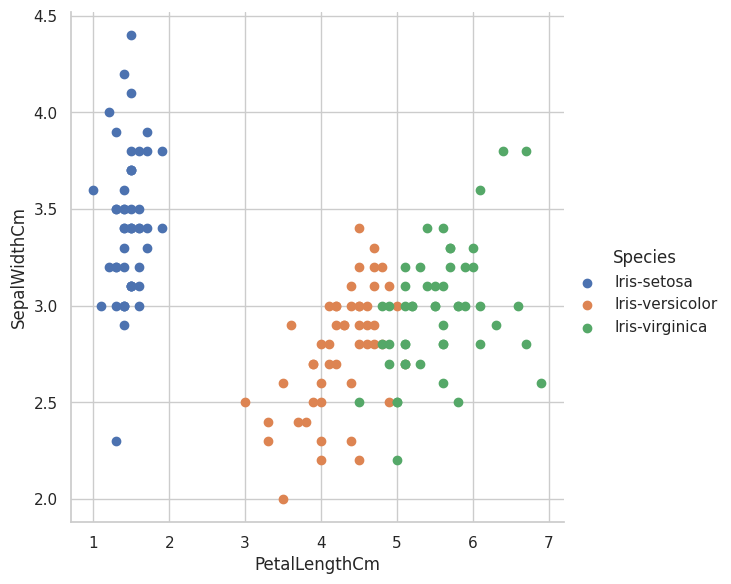

In [15]:
sns.FacetGrid(iris_classification, hue = 'Species', height = 6).map(plt.scatter, 'PetalLengthCm', 'SepalWidthCm').add_legend()

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

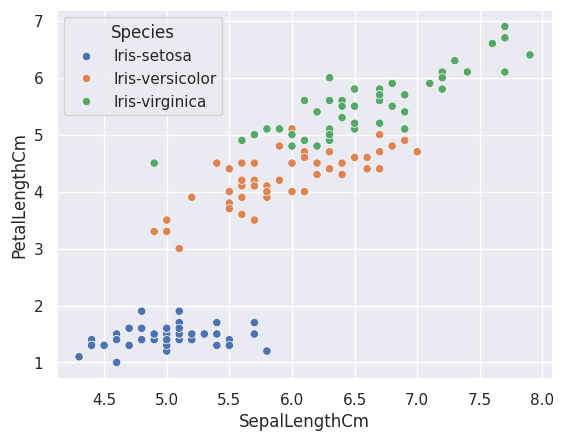

In [16]:
sns.set_theme()
sns.scatterplot(data = iris_classification, x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

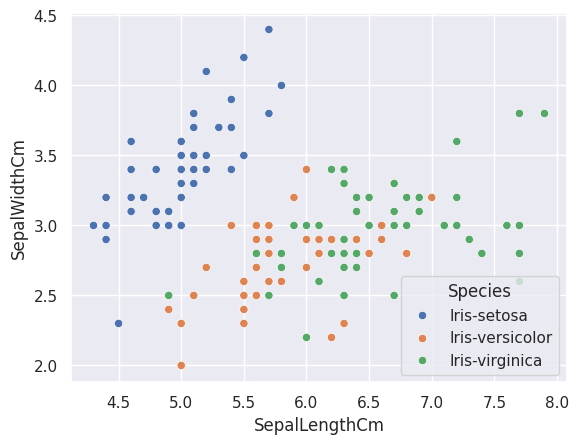

In [17]:
sns.set_theme()
sns.scatterplot(data = iris_classification, x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species')

In [18]:
 # Modifying our categorical columns
 iris_classification.replace({'Species':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace = True)

In [19]:
iris_classification.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [20]:
iris_classification.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [37]:
# Separating features and target variables
X = iris_classification.drop(columns = ['Species', 'Id'], axis = 1)
Y = iris_classification['Species']

In [38]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [39]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [40]:
# Performing train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


In [42]:
# Training our model with Logistic Regression
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, Y_train)

LogisticRegression()

In [45]:
# Prediction of our model
X_train_prediction = model.predict(X_train)

In [46]:
print(X_train_prediction)

[2 0 1 2 1 0 2 1 1 2 1 1 2 1 0 2 0 1 0 0 0 1 2 2 0 2 2 2 2 0 0 2 1 1 2 2 1
 0 1 0 2 1 1 0 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0
 2 0 0 1 2 1 2 1 1 2 1 1 1 2 2 2 2 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1 0
 2 1 0 2 1 0 0 1 0]


In [47]:
# Checking  the accuracy of our predictions
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy)

0.975


In [48]:
# Repeating the process for testing data
X_test_prediction = model.predict(X_test)

In [49]:
print(X_test_prediction)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]


In [50]:
# Checking accuracy for testing data
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(testing_data_accuracy)

0.9666666666666667


In [51]:
# Building a predictive system
input_data= (6.5, 3.9, 4.6, 2.4)
input_data_to_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_to_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if(prediction[0] == 0):
  print("Flower species is Iris-setosa")
elif (prediction[0] == 1):
  print("Flower species is Iris-versicolor")
else:
  print("Flower species is Iris-virginica")

Flower species is Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [53]:
input_data_new= (6.1, 2.9, 4.7, 1.4)
input_data_new_to_numpy_array = np.asarray(input_data_new)

input_data_new_reshaped = input_data_new_to_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_new_reshaped)

if(prediction[0] == 0):
  print("Flower species is Iris-setosa")
elif (prediction[0] == 1):
  print("Flower species is Iris-versicolor")
else:
  print("Flower species is Iris-virginica")

Flower species is Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
